In [1]:
# 필요한 패키지 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
warnings.filterwarnings('ignore')

# Missingno를 활용한 결측치 패턴 분석

In [2]:
# 데이터 로드
titan_data = sns.load_dataset('titanic')
titan_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: >

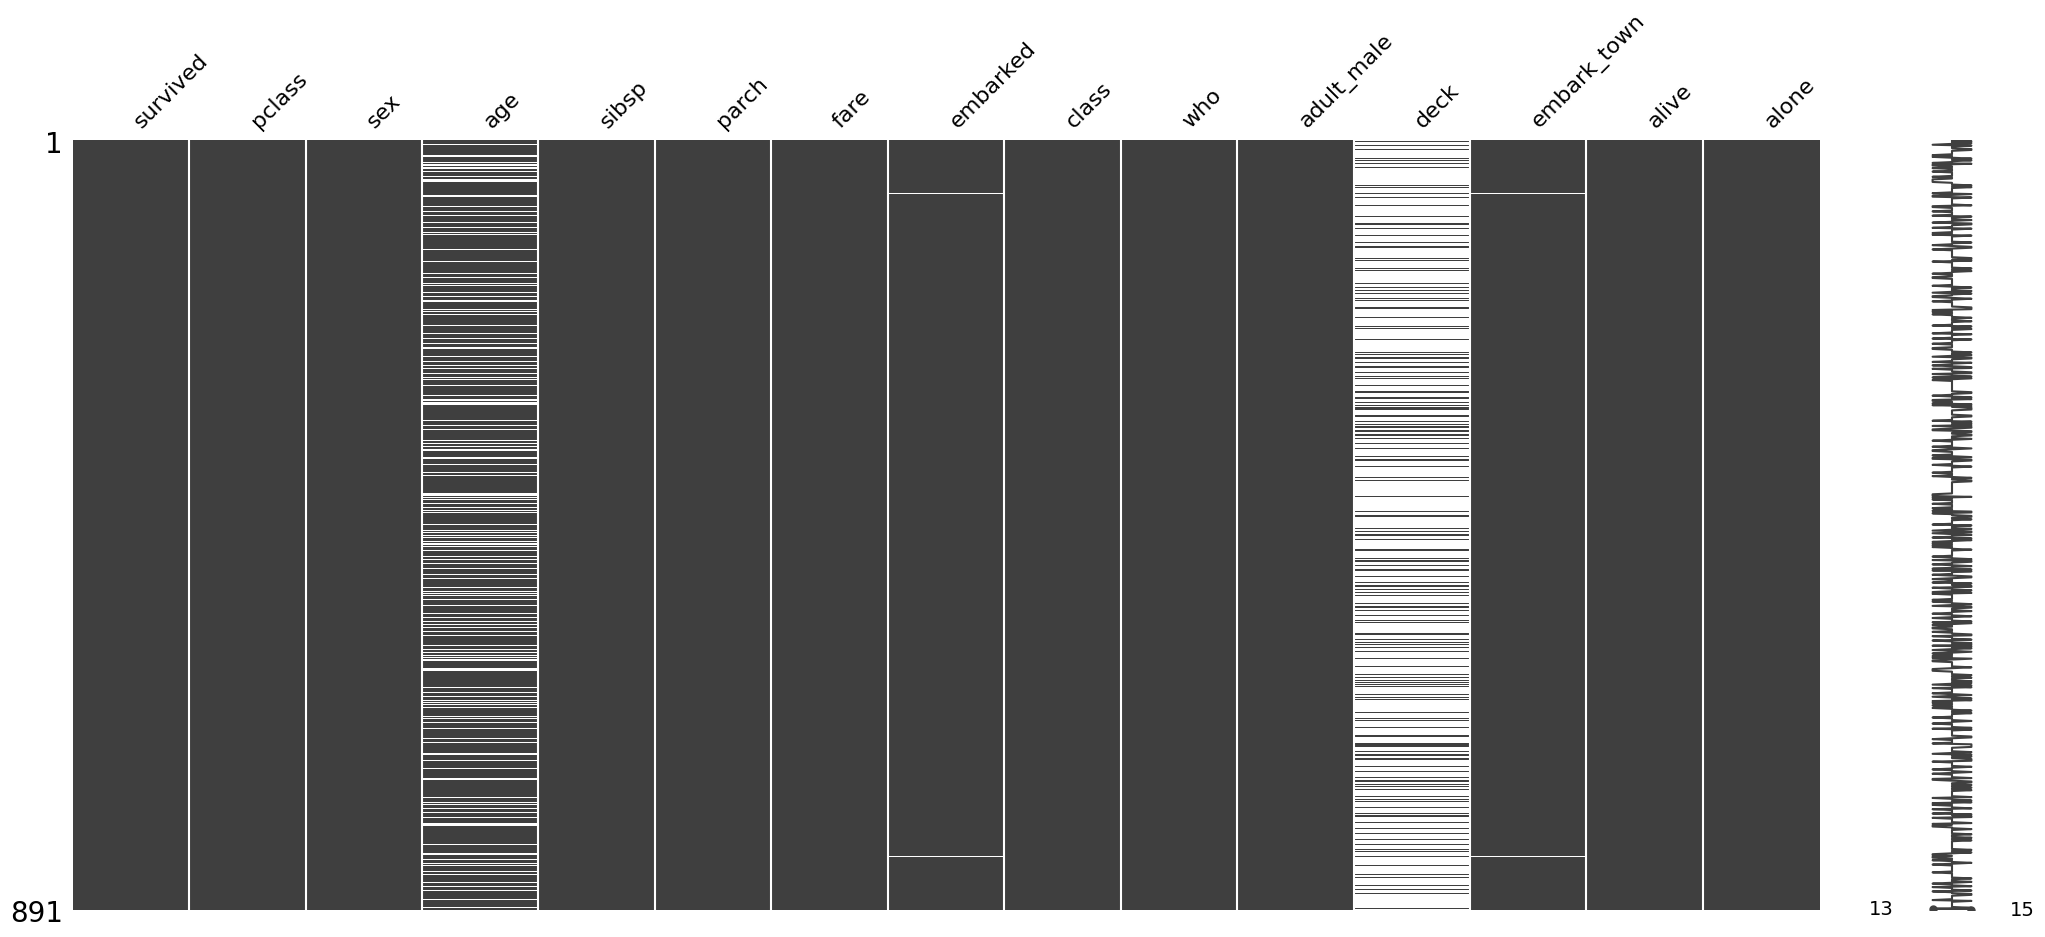

In [3]:
# 각 변수 별 결측데이터 한 눈에 확인
msno.matrix(titan_data)

<Axes: >

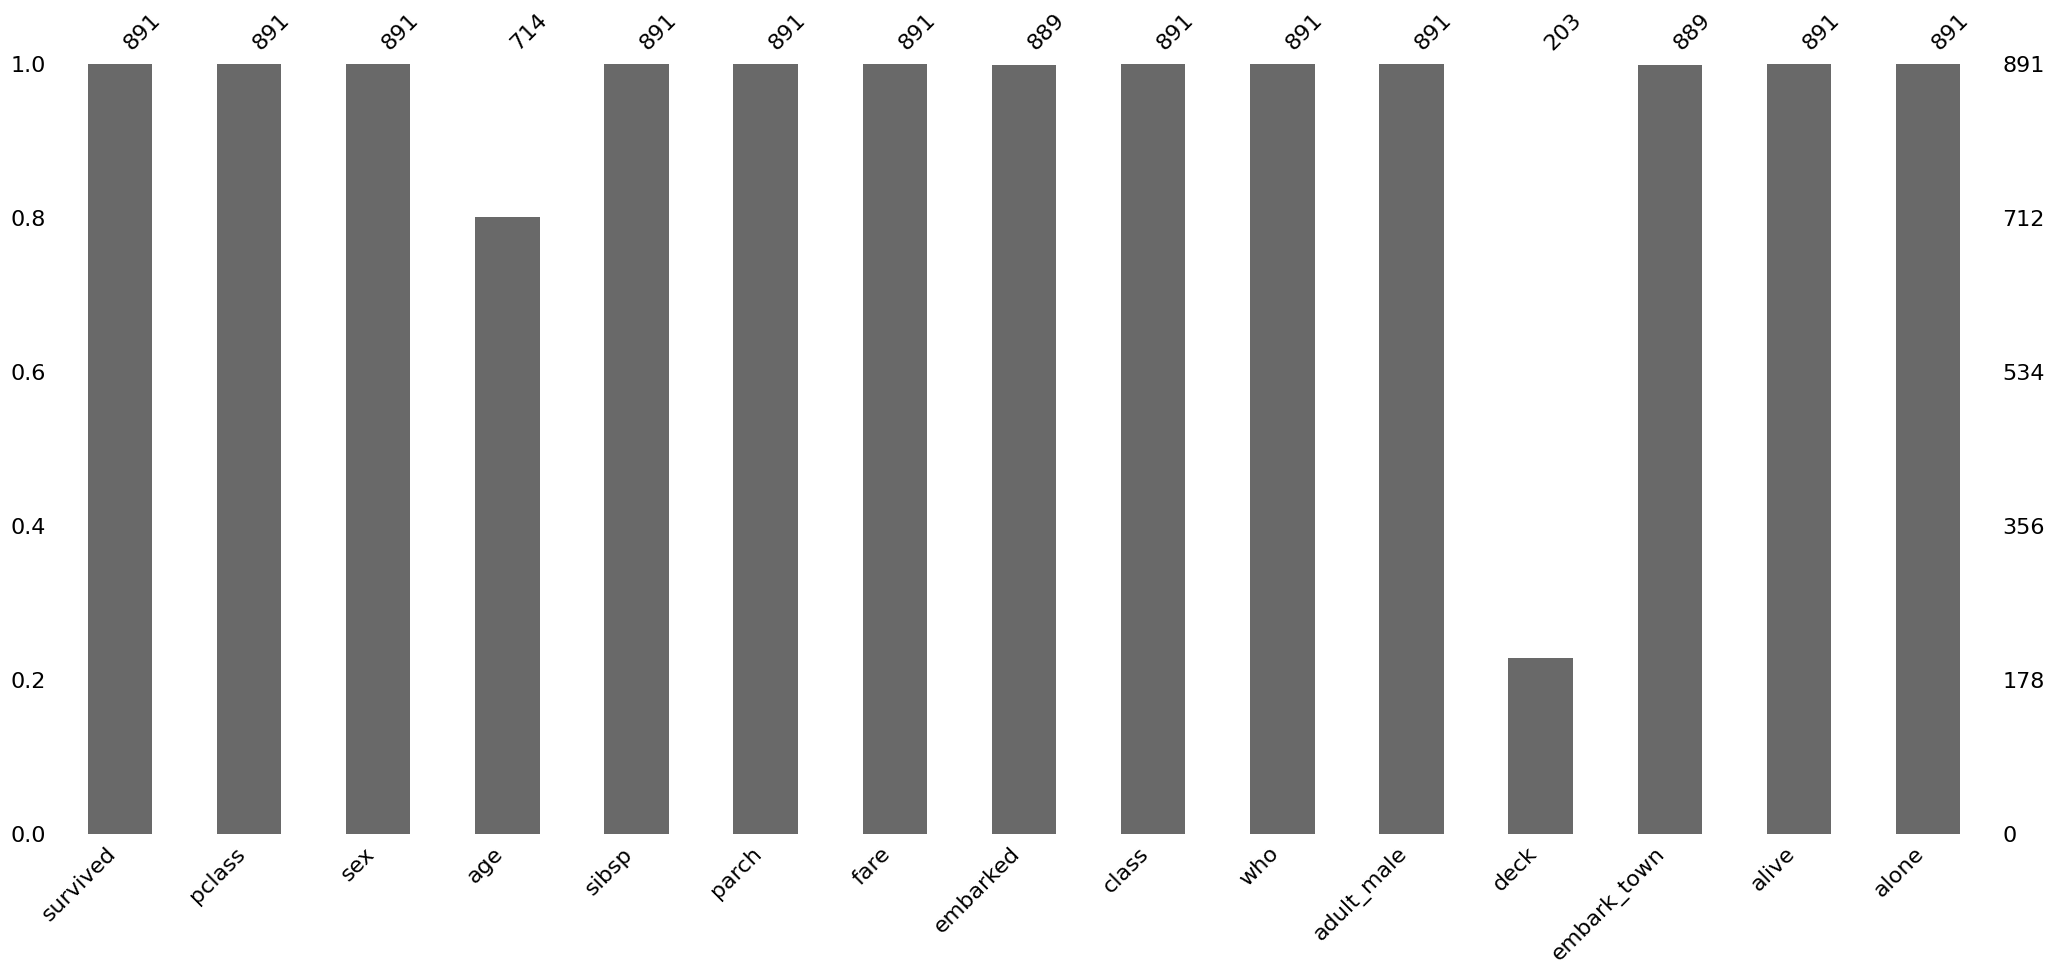

In [4]:
# 각 변수 별 결측 데이터 수 확인
msno.bar(titan_data)

<Axes: >

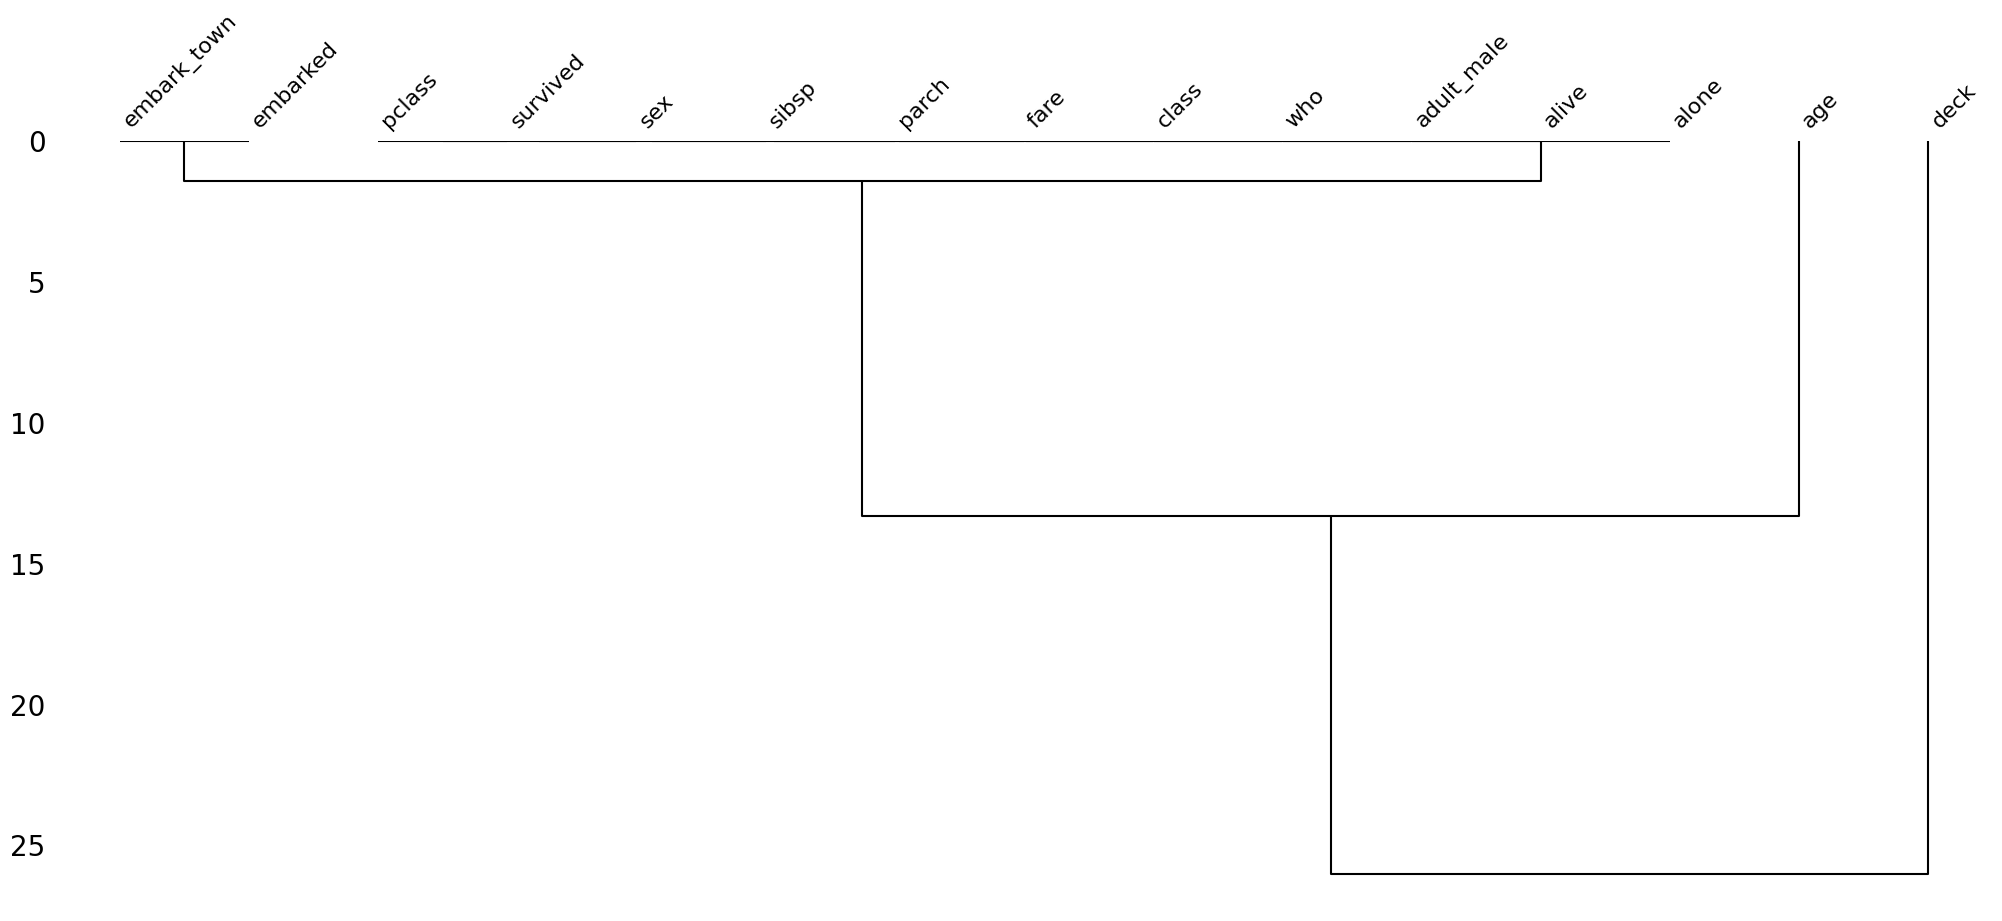

In [5]:
# 결측 데이터의 패턴 분석
# Level 0에서 이어져있는 변수들은 서로 결측 패턴이 동일함을 의미
# 낮은 level에서 이어질수록 변수 간의 상관관계가 높음을 의미
msno.dendrogram(titan_data)

## SimpleImputer

<a href="https://ibb.co/bRQsHcgX"><img src="https://i.postimg.cc/28z94f1J/Simple-Imputer.png" alt="SimpleImputer" border="0"></a>

<a href="https://ibb.co/bRQsHcgX"><img src="https://i.postimg.cc/4NBLPFt3/Simple-Imputer2.png" alt="SimpleImputer" border="0"></a>

In [6]:
# 데이터 로드

titan_data = sns.load_dataset('titanic')
titan_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
titan_data[['age']]

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [8]:
# missing_values에 missing data의 유형을 적어주고, strategy에 imputation 방법을 정의
# strategy 옵션에는 mean, median, most_frequent, constant가 존재

print('The number of missing values in original data: ', sum(titan_data['age'].isna()))
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
titan_data[['age']] = imp_mean.fit_transform(titan_data[['age']])
print('The number of missing values: ', sum(titan_data['age'].isna())) # missing value가 있는지 확인
titan_data

The number of missing values in original data:  177
The number of missing values:  0


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
# strategy를 median으로 선정할 경우

titan_data = sns.load_dataset('titanic')

print('The number of missing values in original data: ', sum(titan_data['age'].isna()))
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
titan_data[['age']] = imp_mean.fit_transform(titan_data[['age']])
print('The number of missing values: ', sum(titan_data['age'].isna())) # missing value가 있는지 확인
titan_data

The number of missing values in original data:  177
The number of missing values:  0


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
# 결측치가 있는 열 (column)이 범주형 변수일 경우 최빈값 사용

titan_data = sns.load_dataset('titanic')

print('The number of missing values in original data: ', sum(titan_data['deck'].isna()))
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
titan_data[['deck']] = imp_mean.fit_transform(titan_data[['deck']])
print('The number of missing values: ', sum(titan_data['deck'].isna()))
titan_data

The number of missing values in original data:  688
The number of missing values:  0


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# K Nearest Neighbor (KNN) 기반 Imputation

<a href="https://ibb.co/bRQsHcgX"><img src="https://i.postimg.cc/1RkBHnvf/KNNImputer.png" alt="KNNImputer" border="0"></a>

In [12]:
numeric_data

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [15]:
# 데이터 로드
titan_data = sns.load_dataset('titanic')

num_cols = titan_data.select_dtypes(include=['int64', 'float64']).columns  # 수치형 변수
numeric_data = titan_data[num_cols] # 수치형 변수를 가진 column만 추출
print('The number of missing values in original data: \n', numeric_data.isna().sum())
# 수치형 데이터들에 대해 정규화 수행
scaler = MinMaxScaler()
imp_num = KNNImputer(n_neighbors=5)
normalized_numeric_data = scaler.fit_transform(numeric_data)
normalized_imputed_numeric_data = imp_num.fit_transform(normalized_numeric_data)

# 원본값의 스케일로 되돌리기
imputed_numeric_data = pd.DataFrame(scaler.inverse_transform(normalized_imputed_numeric_data), columns=num_cols)

titan_data[num_cols] = imputed_numeric_data
print('\n The number of missing values in original data: \n', imputed_numeric_data.isna().sum())
titan_data

The number of missing values in original data: 
 survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

 The number of missing values in original data: 
 survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,male,27.0,0.0,0.0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1.0,1.0,female,19.0,0.0,0.0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0.0,3.0,female,25.3,1.0,2.0,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1.0,1.0,male,26.0,0.0,0.0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [16]:
# 범주형 변수까지 Imputation 하기 위한 작업

# 데이터 로드
titan_data = sns.load_dataset('titanic')
print('The number of missing values in original data: \n', titan_data.isna().sum())
num_cols = titan_data.select_dtypes(include=['int64', 'float64']).columns  # 수치형 변수
cat_cols = titan_data.select_dtypes(include=['object', 'category']).columns # 범주형 변수
numeric_data = titan_data[num_cols] # 수치형 변수를 가진 column만 추출
categ_data = titan_data[cat_cols] # 범주형 변수를 가진 column만 추출

# 수치형 데이터들에 대해 normalization 및 Imputation 수행
scaler = MinMaxScaler()
imp_num = KNNImputer(n_neighbors=5)
normalized_numeric_data = scaler.fit_transform(numeric_data)
normalized_imputed_numeric_data = imp_num.fit_transform(normalized_numeric_data)

# 원본값의 scale로 되돌리기
imputed_numeric_data = pd.DataFrame(scaler.inverse_transform(normalized_imputed_numeric_data), columns=num_cols)

# 범주형 데이터들에 대한 Imputation
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed_cat_data = pd.DataFrame(imp_cat.fit_transform(categ_data), columns=cat_cols)

titan_data[num_cols] = imputed_numeric_data
titan_data[cat_cols] = imputed_cat_data
print('\n The number of missing values in original data: \n', titan_data.isna().sum())
titan_data

The number of missing values in original data: 
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

 The number of missing values in original data: 
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,male,27.0,0.0,0.0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1.0,1.0,female,19.0,0.0,0.0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0.0,3.0,female,25.3,1.0,2.0,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1.0,1.0,male,26.0,0.0,0.0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# MICE

<a href="https://ibb.co/bRQsHcgX"><img src="https://i.postimg.cc/MGj9W6Lc/MICE.png" alt="MICE" border="0"></a>

In [17]:
# 범주형 변수까지 Imputation 하기 위한 작업

# 데이터 로드
titan_data = sns.load_dataset('titanic')
print('The number of missing values in original data: \n', titan_data.isna().sum())

num_cols = titan_data.select_dtypes(include=['int64', 'float64']).columns  # 수치형 변수
cat_cols = titan_data.select_dtypes(include=['object', 'category']).columns # 범주형 변수
numeric_data = titan_data[num_cols] # 수치형 변수를 가진 column만 추출
categ_data = titan_data[cat_cols] # 범주형 변수를 가진 column만 추출

# 수치형 데이터들에 대해 normalization 및 Imputation 수행
scaler = MinMaxScaler()
imp_num = IterativeImputer(estimator=LinearRegression(), max_iter = 10)
normalized_numeric_data = scaler.fit_transform(numeric_data)
normalized_imputed_numeric_data = imp_num.fit_transform(normalized_numeric_data)

# 원본값의 scale로 되돌리기
imputed_numeric_data = pd.DataFrame(scaler.inverse_transform(normalized_imputed_numeric_data), columns=num_cols)

# 범주형 데이터들에 대한 Imputation
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed_cat_data = pd.DataFrame(imp_cat.fit_transform(categ_data), columns=cat_cols)

titan_data[num_cols] = imputed_numeric_data
titan_data[cat_cols] = imputed_cat_data
print('\n The number of missing values in original data: \n', titan_data.isna().sum())
titan_data

The number of missing values in original data: 
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

 The number of missing values in original data: 
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,male,22.000000,1.0,0.0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1.0,1.0,female,38.000000,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1.0,3.0,female,26.000000,0.0,0.0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1.0,1.0,female,35.000000,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0.0,3.0,male,35.000000,0.0,0.0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,male,27.000000,0.0,0.0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1.0,1.0,female,19.000000,0.0,0.0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0.0,3.0,female,23.301264,1.0,2.0,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1.0,1.0,male,26.000000,0.0,0.0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Toy Example: MCAR, MAR, MNAR에 대해 Imputation 방법론들 적용

<a href="https://ibb.co/bRQsHcgX"><img src="https://i.postimg.cc/zBQDTkj2/Imputation-Type.png" alt="ImputationType" border="0"></a>

<Axes: >

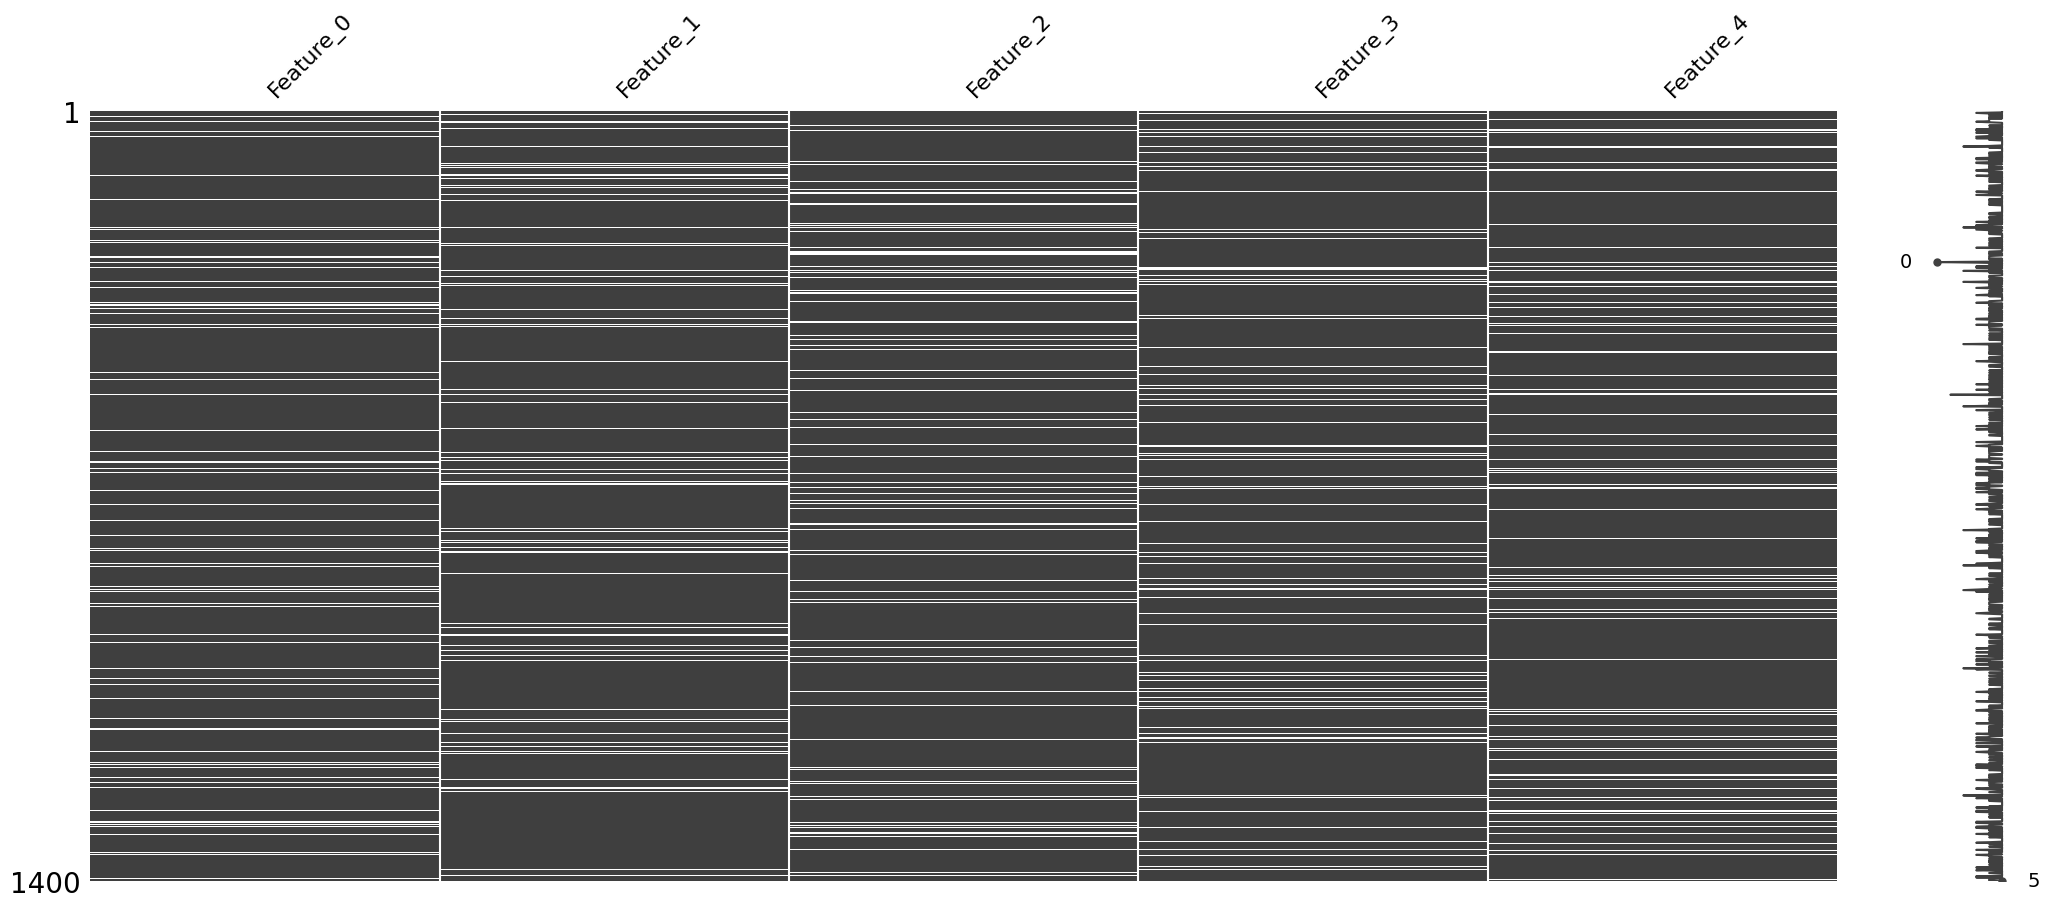

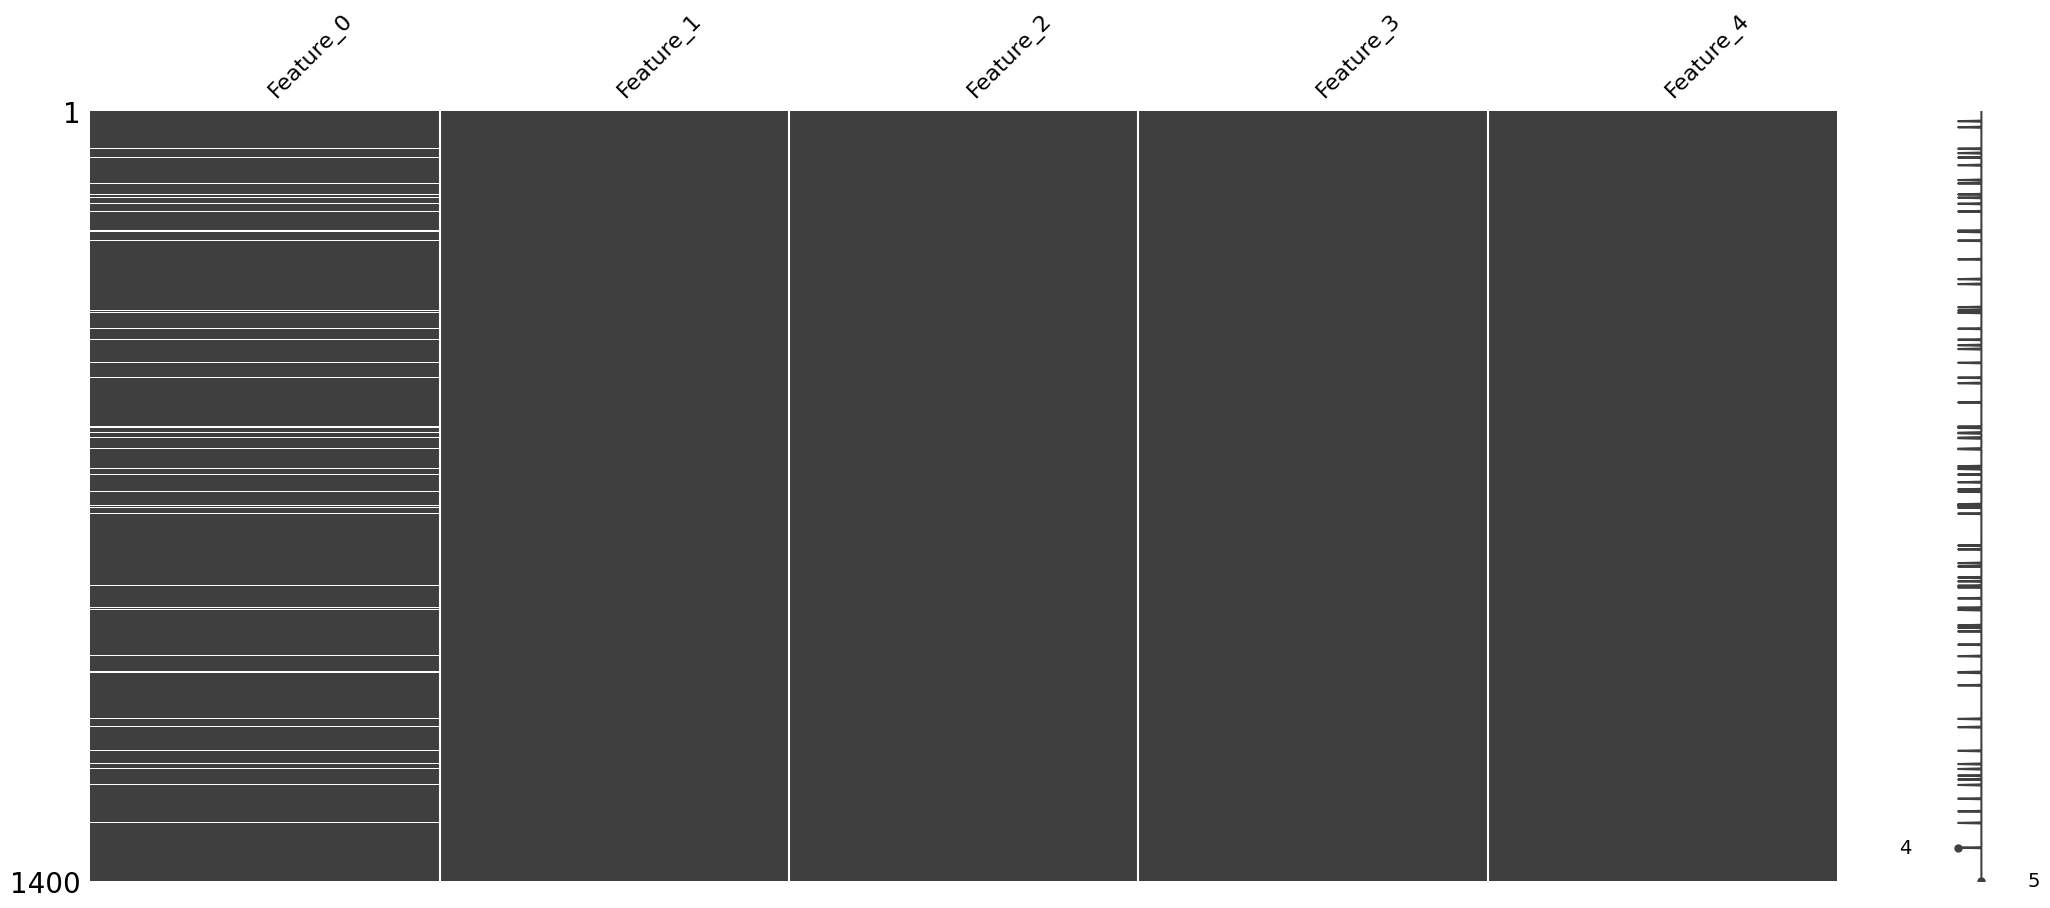

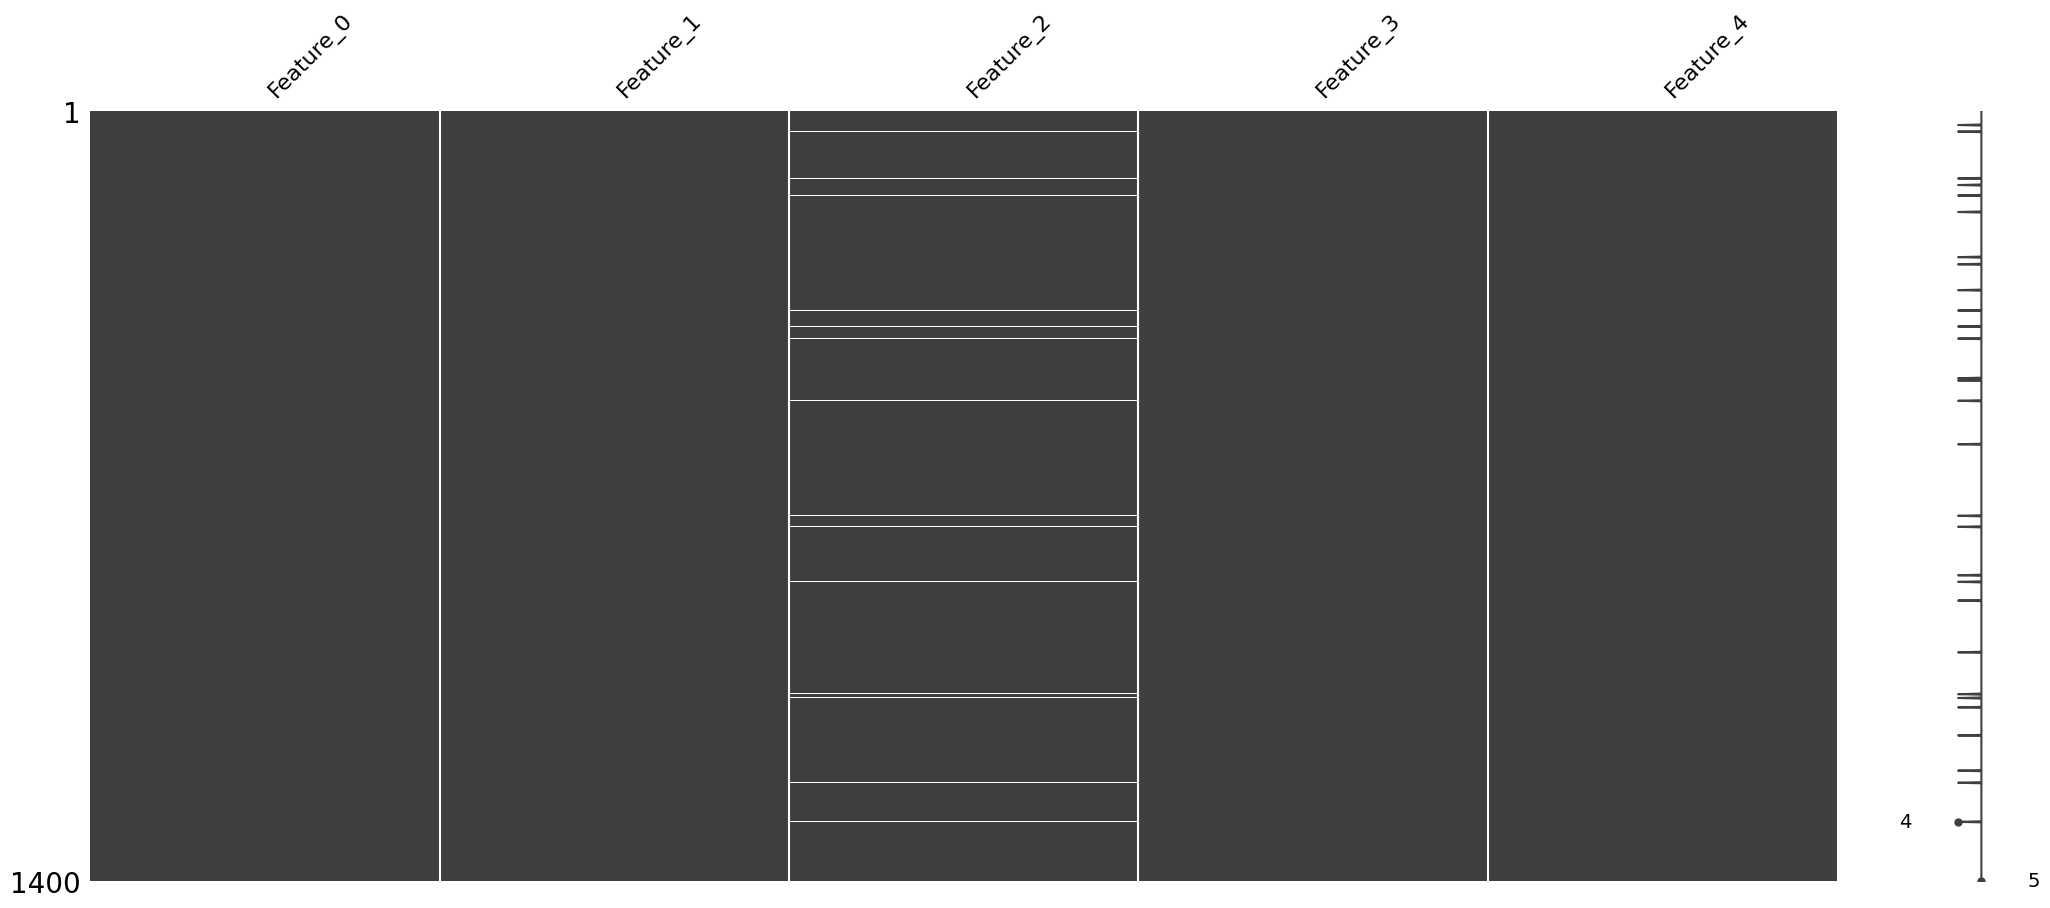

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# 시각화가 노트북 상에서 바로 뜨도록 설정
%matplotlib inline

# 1) 데이터 생성
# ---------------------------
X_full, y_full = make_classification(
    n_samples=2000,
    n_features=5,
    n_informative=2,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# DataFrame으로 변환해서 다루기 편하도록 만들기
df_full = pd.DataFrame(X_full, columns=[f"Feature_{i}" for i in range(X_full.shape[1])])
df_full['Target'] = y_full

# 원본 데이터를 학습/테스트로 분할
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    df_full.drop('Target', axis=1),
    df_full['Target'],
    test_size=0.3,
    random_state=42
)

# 2) 결측치 생성 함수들
# ---------------------------

def introduce_mcar(X: pd.DataFrame, missing_rate=0.2, seed=42):
    """
    MCAR: Missing Completely At Random
    아무런 조건 없이 랜덤하게 missing_rate 비율로 결측치를 만듦
    """
    np.random.seed(seed)
    X_mcar = X.copy()
    n_total = X_mcar.size  # 전체 셀 개수 (데이터 개수 * 피처 수)
    n_missing = int(n_total * missing_rate)

    # 전체 셀에서 임의로 n_missing개를 골라 결측치로 만듦
    missing_indices = np.random.choice(n_total, n_missing, replace=False)

    # 2D를 1D로 바꿔서 처리한 후 다시 원상 복구
    X_flat = X_mcar.values.flatten()
    X_flat[missing_indices] = np.nan
    X_mcar[:] = X_flat.reshape(X_mcar.shape)

    return X_mcar

def introduce_mar(X: pd.DataFrame, missing_rate=0.2, seed=42):
    """
    MAR: Missing At Random
    다른 관측된 변수(예: Feature_1) 값에 따라 결측 발생 확률이 달라진다고 가정
    예시: Feature_1의 값이 크면 Feature_0이 결측될 확률이 높아짐
    """
    np.random.seed(seed)
    X_mar = X.copy()

    n_samples, n_features = X_mar.shape

    # 예시로 Feature_1 값을 기준으로 Feature_0에 결측을 발생
    # Feature_1이 특정 임계값(중간값)보다 큰 경우, Feature_0에서 missing_rate만큼 결측 발생
    threshold = X_mar['Feature_1'].median()

    for i in X.index.values:
        if X_mar.loc[i, 'Feature_1'] > threshold:
            # missing_rate 확률로 Feature_0에 결측 삽입
            if np.random.rand() < missing_rate:
                X_mar.loc[i, 'Feature_0'] = np.nan

    return X_mar

def introduce_mnar(X: pd.DataFrame, missing_rate=0.2, seed=42):
    """
    MNAR: Missing Not At Random
    결측이 발생하는 해당 변수의 '자신의 값'에 따라 결측 발생 확률이 달라짐
    예시: Feature_2에서 Feature_2의 값이 매우 큰(또는 작은) 경우에만 결측이 발생한다고 가정
    """
    np.random.seed(seed)
    X_mnar = X.copy()

    # Feature_2 기준으로 값이 상위 20%이면 missing_rate로 결측 발생
    cutoff = X_mnar['Feature_2'].quantile(0.8)  # 상위 20%

    for i in X_mnar.index.values:
        if X_mnar.loc[i, 'Feature_2'] > cutoff:
            if np.random.rand() < missing_rate:
                X_mnar.loc[i, 'Feature_2'] = np.nan

    return X_mnar


# 3) Imputation 실험 함수
# ---------------------------------------------------------
def run_missing_data_experiment(X_incomplete, y, scenario_name="MCAR"):
    """
    주어진 결측치가 있는 X_incomplete에 대해
    1) 여러 Imputation 방법 비교
       - No Imputation (결측치 행/열 드롭 또는 모델에서 처리 불가 시 샘플 드롭)
       - SimpleImputer (mean, median, most_frequent)
       - IterativeImputer
       - KNNImputer
    2) 각 방법별 DecisionTree 정확도 비교
    """
    print(f"==== {scenario_name} 시나리오 ====")

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X_incomplete,
        y,
        test_size=0.3,
        random_state=42
    )

    results = {}

    # (A) Imputation을 전혀 하지 않는 경우
    # 결측치가 있는 행을 드롭하는 방식을 사용해 "No Imputation" 성능을 확인

    X_test_drop = X_test.dropna(axis=0)
    y_test_drop = y_test.loc[X_test_drop.index]

    cls_no_imp = DecisionTreeClassifier()
    cls_no_imp.fit(X_train, y_train)
    y_pred_no_imp = cls_no_imp.predict(X_test_drop)
    f1_no_imp = f1_score(y_test_drop, y_pred_no_imp)

    results['No Imputation'] = f1_no_imp


    results['No Imputation'] = f1_no_imp

    # (B) SimpleImputer
    for strategy in ['mean', 'median', 'most_frequent']:
        imputer = SimpleImputer(strategy=strategy)
        X_train_imp = imputer.fit_transform(X_train)

        cls = DecisionTreeClassifier()
        cls.fit(X_train_imp, y_train)
        y_pred = cls.predict(X_test_drop)
        f1 = f1_score(y_test_drop, y_pred)

        results[f'SimpleImputer({strategy})'] = f1

    # (C) IterativeImputer
    iterative_imputer = IterativeImputer(random_state=42, max_iter=20)
    X_train_iter = iterative_imputer.fit_transform(X_train)

    cls_iter = DecisionTreeClassifier()
    cls_iter.fit(X_train_iter, y_train)
    y_pred_iter = cls_iter.predict(X_test_drop)
    f1_iter = f1_score(y_test_drop, y_pred_iter)
    results['IterativeImputer'] = f1_iter

    # (D) KNNImputer
    knn_imputer = KNNImputer(n_neighbors=5)
    X_train_knn = knn_imputer.fit_transform(X_train)

    cls_knn = DecisionTreeClassifier()
    cls_knn.fit(X_train_knn, y_train)
    y_pred_knn = cls_knn.predict(X_test_drop)
    f1_knn = f1_score(y_test_drop, y_pred_knn)
    results['KNNImputer'] = f1_knn

    # 결과 출력
    for method, f1 in results.items():
        print(f"{method}: F1 = {f1:.4f}")
    print("")


# 4) 각 시나리오별로 실험 수행
# ---------------------------
# (1) MCAR
X_mcar = introduce_mcar(X_train_full, missing_rate=0.1, seed=42)
msno.matrix(X_mcar)

# (2) MAR
X_mar = introduce_mar(X_train_full, missing_rate=0.1, seed=42)
msno.matrix(X_mar)

# (3) MNAR
X_mnar = introduce_mnar(X_train_full, missing_rate=0.1, seed=42)
msno.matrix(X_mnar)

In [ ]:
# 각 시나리오 별 Imputation method들의 성능 확인 (F1 score가 1에 가까울수록 좋은 성능)
run_missing_data_experiment(X_mcar, y_train_full, scenario_name="MCAR")
run_missing_data_experiment(X_mar, y_train_full, scenario_name="MAR")
run_missing_data_experiment(X_mnar, y_train_full, scenario_name="MNAR")

==== MCAR 시나리오 ====
No Imputation: F1 = 0.8968
SimpleImputer(mean): F1 = 0.8760
SimpleImputer(median): F1 = 0.8765
SimpleImputer(most_frequent): F1 = 0.8863
IterativeImputer: F1 = 0.8594
KNNImputer: F1 = 0.8468

==== MAR 시나리오 ====
No Imputation: F1 = 0.8678
SimpleImputer(mean): F1 = 0.8775
SimpleImputer(median): F1 = 0.8691
SimpleImputer(most_frequent): F1 = 0.8657
IterativeImputer: F1 = 0.8949
KNNImputer: F1 = 0.8734

==== MNAR 시나리오 ====
No Imputation: F1 = 0.8658
SimpleImputer(mean): F1 = 0.8687
SimpleImputer(median): F1 = 0.8766
SimpleImputer(most_frequent): F1 = 0.8750
IterativeImputer: F1 = 0.8772
KNNImputer: F1 = 0.8693

